In [1]:
import pandas as pd
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from joblib import dump
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Load Dataset
df = pd.read_csv("emotions.csv")  


# 2. Data Preprocessing

In [ ]:
df['clean_text'] = df['text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)


# splite data

In [4]:

X = df['clean_text']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# 4. Build ML Pipeline
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression(max_iter=200))
])

In [6]:
# 5. Train the Model
pipe.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LogisticRegression(max_iter=200))])

In [7]:
# 6. Evaluate
y_pred = pipe.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

       happy       0.33      1.00      0.50         1
         sad       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

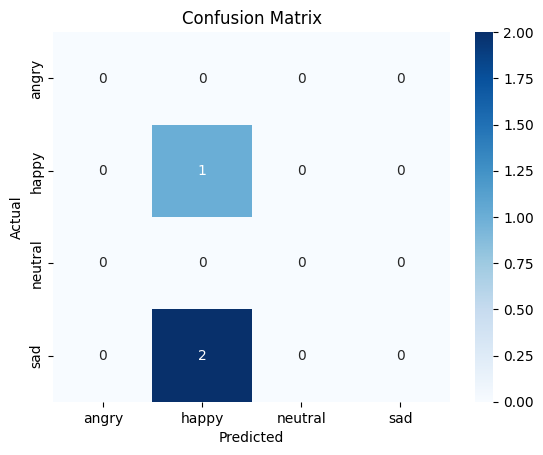

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
sns.heatmap(cm, annot=True, xticklabels=pipe.classes_, yticklabels=pipe.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# 7. Save Model
dump(pipe, 'emotion_model.joblib')
print("Model saved as emotion_model.joblib")


Model saved as emotion_model.joblib


In [10]:
# 8. Optional: Predict a custom sentence
text = input("Enter a sentence to detect emotion: ")
prediction = pipe.predict([text])
print(f"Predicted Emotion: {prediction[0]}")

Enter a sentence to detect emotion:  i'm liking it


Predicted Emotion: happy
